In [ ]:
import pandas as pd

df = pd.read_csv('2021-2025.csv', low_memory=False)

print(df.head())

   OBJECTID  ChargeId IncidentNumber ReportNumber FireArmInvolved  \
0    732646   4368142      213645043  213645043-1              no   
1    732647   4368335      213645034  213645034-1              no   
2    732648   4368359      213645037  213645037-1              no   
3    732649   4368481      213645030  213645030-1              no   
4    732650   4368485      213645028  213645028-1              no   

               ReportDate        OccurredFromDate          OccurredToDate  \
0   12/30/2021 3:14:05 PM   12/19/2021 6:40:00 PM   12/20/2021 3:40:00 PM   
1   12/30/2021 1:35:16 PM  12/28/2021 10:00:00 PM  12/28/2021 10:10:00 PM   
2   12/30/2021 2:42:52 PM   11/16/2021 6:10:00 PM  11/17/2021 11:10:00 PM   
3   12/30/2021 1:05:42 PM    9/18/2021 6:58:00 PM   12/29/2021 7:20:00 AM   
4  12/30/2021 12:54:49 PM   12/29/2021 5:05:00 AM   12/29/2021 5:05:00 AM   

  Day_of_the_week  Day_Number  ...    LocationType press_release social_media  \
0          Sunday           1  ...   SHOP

In [ ]:
# Data cleanup
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Missing values - Column vise:\n\n", missing_values)

# Cant really do data augmentation for columns like zone or location!
# Dropping these seem like the best bet right now! -- re evaluate later!

# if more than 30% of data is missing in a column, drop that column!
threshold = df.shape[0] * 0.3
dropped_columns = [col for col in df.columns if df[col].isnull().sum() > threshold]
df_cleaned = df.drop(columns=dropped_columns)
print("\nDropped Columns:", dropped_columns)
print("\nFinal Columns:", df_cleaned.columns.tolist())

# if any critical field is missing, eg: location , drop that row!
# should ideally add lat, long, reportnumber, etc --> but they dont have any missing values, so for now should be good!
critical_cols = ["Zone", "Beat", "Zone_int", "LocationType", "ReportDate", "NIBRS_Offense", "NibrsUcrCode", "Latitude", "Longitude", "NhoodName"]
df_cleaned = df_cleaned.dropna(subset=critical_cols)

df = df_cleaned

df.head()


Missing values - Column vise:

 social_media     246874
press_release    245964
Vic_Count        215585
NhoodName         18636
DISTRICT           9607
NPU                9605
StreetAddress      1852
Zone                445
Beat                445
Zone_int            445
LocationType         53
ReportDate            2
dtype: int64

Dropped Columns: ['Vic_Count', 'press_release', 'social_media']

Final Columns: ['OBJECTID', 'ChargeId', 'IncidentNumber', 'ReportNumber', 'FireArmInvolved', 'ReportDate', 'OccurredFromDate', 'OccurredToDate', 'Day_of_the_week', 'Day_Number', 'Part', 'Crime_Against', 'NibrsUcrCode', 'NIBRS_Offense', 'StreetAddress', 'Longitude', 'Latitude', 'IsBiasMotivationInvolved', 'event_watch', 'Zone', 'Zone_int', 'LocationType', 'Beat', 'NhoodName', 'DISTRICT', 'NPU', 'GlobalID', 'x', 'y']


,OBJECTID,ChargeId,IncidentNumber,ReportNumber,FireArmInvolved,ReportDate,OccurredFromDate,OccurredToDate,Day_of_the_week,Day_Number,...,Zone,Zone_int,LocationType,Beat,NhoodName,DISTRICT,NPU,GlobalID,x,y
0,732646,4368142,213645043,213645043-1,no,12/30/2021 3:14:05 PM,12/19/2021 6:40:00 PM,12/20/2021 3:40:00 PM,Sunday,1,...,Zone 2,2.0,SHOPPING_MALL,210.0,Lenox,7.0,B,c2586b1e-64e9-4618-bfeb-39a978bca306,-84.362358,33.845306
1,732647,4368335,213645034,213645034-1,no,12/30/2021 1:35:16 PM,12/28/2021 10:00:00 PM,12/28/2021 10:10:00 PM,Tuesday,3,...,Zone 6,6.0,RESIDENCE_HOME,609.0,Edgewood,5.0,O,e6d9f36b-7960-4b82-a58e-1e91d9afa42f,-84.347267,33.758172
2,732648,4368359,213645037,213645037-1,no,12/30/2021 2:42:52 PM,11/16/2021 6:10:00 PM,11/17/2021 11:10:00 PM,Tuesday,3,...,Zone 4,4.0,OTHER_UNKNOWN,403.0,Cascade Avenue/Road,4.0,S,ea7acb56-87c0-4ded-8121-d60dd2bcc4ca,-84.437838,33.725160
3,732649,4368481,213645030,213645030-1,no,12/30/2021 1:05:42 PM,9/18/2021 6:58:00 PM,12/29/2021 7:20:00 AM,Saturday,7,...,Zone 6,6.0,CYBERSPACE,606.0,Reynoldstown,5.0,N,219169a9-67bf-4836-912a-d2d1aab88f11,-84.351699,33.757101
4,732650,4368485,213645028,213645028-1,no,12/30/2021 12:54:49 PM,12/29/2021 5:05:00 AM,12/29/2021 5:05:00 AM,Wednesday,4,...,Zone 3,3.0,CYBERSPACE,305.0,Chosewood Park,1.0,Y,682c4d84-1c9e-4421-9d2f-17915b249387,-84.376192,33.716448


In [ ]:

# Print minimum and maximum dates for the 'ReportDate' column
min_date = df['ReportDate'].min()
max_date = df['ReportDate'].max()

print(f"Minimum Report Date: {min_date}")
print(f"Maximum Report Date: {max_date}")


# Convert 'ReportDate' to datetime, coercing errors to NaT
df["ReportDate"] = pd.to_datetime(df["ReportDate"], errors="coerce")

# Find rows where 'ReportDate' is NaT
invalid_dates = df[df["ReportDate"].isna()]
print(f"Number of invalid date entries: {len(invalid_dates)}")
print(invalid_dates["ReportDate"].head())

# For rows with invalid 'ReportDate', use 'OccurredToDate' as a fallback
df["ReportDate"].fillna(pd.to_datetime(df["OccurredToDate"], errors="coerce"), inplace=True)

# Now print the count of invalid entries for 'ReportDate' (if any)
invalid_dates_after_filling = df[df_cleaned["ReportDate"].isna()]


Minimum Report Date: 1/1/2021 10:01:43 PM
Maximum Report Date: 9/9/2024 9:59:14 PM


<ipython-input-4-5452269c25d1>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ReportDate"] = pd.to_datetime(df["ReportDate"], errors="coerce")


Number of invalid date entries: 1
235667   NaT
Name: ReportDate, dtype: datetime64[ns]


<ipython-input-4-5452269c25d1>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ReportDate"].fillna(pd.to_datetime(df["OccurredToDate"], errors="coerce"), inplace=True)
<ipython-input-4-5452269c25d1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ReportDate"].fillna(pd.to_datetime(df["OccurredToDate"], errors="coerce"), inplace=True)


In [ ]:
group_a_offense_codes = {
    "100": "Murder and Nonnegligent Manslaughter",
    "11": "Negligent Manslaughter",
    "09": "Justifiable Homicide",
    "120": "Robbery",
    "13A": "Aggravated Assault",
    "13B": "Simple Assault",
    "13C": "Intimidation",
    "200": "Kidnapping/Abduction",
    "210": "Rape",
    "11A": "Forcible Sodomy",
    "11B": "Sexual Assault With An Object",
    "11C": "Fondling",
    "220": "Burglary/Breaking and Entering",
    "23A": "Larceny - Pocket-picking",
    "23B": "Larceny - Purse-snatching",
    "23C": "Larceny - Shoplifting",
    "23D": "Larceny - From Building",
    "23E": "Larceny - From Coin Machine",
    "23F": "Larceny - From Motor Vehicle",
    "23G": "Larceny - Motor Vehicle Parts",
    "23H": "Larceny - All Other",
    "240": "Motor Vehicle Theft",
    "250": "Counterfeiting/Forgery",
    "26A": "Fraud - False Pretenses/Swindle/Confidence Game",
    "26B": "Fraud - Credit Card/ATM Fraud",
    "26C": "Fraud - Impersonation",
    "26D": "Fraud - Welfare Fraud",
    "26E": "Fraud - Wire Fraud",
    "26F": "Fraud - Identity Theft",
    "26G": "Fraud - Hacking/Computer Invasion",
    "270": "Embezzlement",
    "280": "Stolen Property Offenses",
    "290": "Destruction/Damage/Vandalism of Property",
    "35A": "Drug/Narcotic Violations",
    "35B": "Drug Equipment Violations",
    "36A": "Incest",
    "36B": "Statutory Rape",
    "370": "Pornography/Obscene Material",
    "39A": "Betting/Wagering",
    "39B": "Operating/Promoting/Assisting Gambling",
    "39C": "Gambling Equipment Violations",
    "39D": "Sports Tampering",
    "40A": "Prostitution",
    "40B": "Assisting or Promoting Prostitution",
    "40C": "Purchasing Prostitution",
    "520": "Weapon Law Violations"
}

group_b_offense_codes = {
    "90A": "Bad Checks",
    "90B": "Curfew/Loitering/Vagrancy Violations",
    "90C": "Disorderly Conduct",
    "90D": "Driving Under the Influence",
    "90E": "Drunkenness",
    "90F": "Family Offenses, Nonviolent",
    "90G": "Liquor Law Violations",
    "90H": "Peeping Tom",
    "90I": "Runaway",
    "90J": "Trespass of Real Property",
    "90Z": "All Other Offenses"
}


In [ ]:
offense_code_map = {
    "GroupA": list(group_a_offense_codes.keys()),
    "GroupB": list(group_b_offense_codes.keys())
}

print(offense_code_map)


{'GroupA': ['100', '11', '09', '120', '13A', '13B', '13C', '200', '210', '11A', '11B', '11C', '220', '23A', '23B', '23C', '23D', '23E', '23F', '23G', '23H', '240', '250', '26A', '26B', '26C', '26D', '26E', '26F', '26G', '270', '280', '290', '35A', '35B', '36A', '36B', '370', '39A', '39B', '39C', '39D', '40A', '40B', '40C', '520'], 'GroupB': ['90A', '90B', '90C', '90D', '90E', '90F', '90G', '90H', '90I', '90J', '90Z']}


In [ ]:
def get_offense_group(code):
    if code in offense_code_map["GroupA"]:
        return "GroupA"
    elif code in offense_code_map["GroupB"]:
        return "GroupB"
    else:
        return "Unknown"

# Apply function to create a new column
df['OffenseGroup'] = df['NibrsUcrCode'].apply(get_offense_group)

print(df.head())

   OBJECTID  ChargeId IncidentNumber ReportNumber FireArmInvolved  \
0    732646   4368142      213645043  213645043-1              no   
1    732647   4368335      213645034  213645034-1              no   
2    732648   4368359      213645037  213645037-1              no   
3    732649   4368481      213645030  213645030-1              no   
4    732650   4368485      213645028  213645028-1              no   

           ReportDate        OccurredFromDate          OccurredToDate  \
0 2021-12-30 15:14:05   12/19/2021 6:40:00 PM   12/20/2021 3:40:00 PM   
1 2021-12-30 13:35:16  12/28/2021 10:00:00 PM  12/28/2021 10:10:00 PM   
2 2021-12-30 14:42:52   11/16/2021 6:10:00 PM  11/17/2021 11:10:00 PM   
3 2021-12-30 13:05:42    9/18/2021 6:58:00 PM   12/29/2021 7:20:00 AM   
4 2021-12-30 12:54:49   12/29/2021 5:05:00 AM   12/29/2021 5:05:00 AM   

  Day_of_the_week  Day_Number  ... Zone_int    LocationType   Beat  \
0          Sunday           1  ...      2.0   SHOPPING_MALL  210.0   
1     

In [ ]:
def categorize_time(dt):
    hour = dt.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply function
df['OccurredFromDate'] = pd.to_datetime(df['OccurredFromDate'])
df['TimeCategory'] = df['OccurredFromDate'].apply(categorize_time)

print(df.head())

<ipython-input-8-d6d91e984fb4>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OccurredFromDate'] = pd.to_datetime(df['OccurredFromDate'])


   OBJECTID  ChargeId IncidentNumber ReportNumber FireArmInvolved  \
0    732646   4368142      213645043  213645043-1              no   
1    732647   4368335      213645034  213645034-1              no   
2    732648   4368359      213645037  213645037-1              no   
3    732649   4368481      213645030  213645030-1              no   
4    732650   4368485      213645028  213645028-1              no   

           ReportDate    OccurredFromDate          OccurredToDate  \
0 2021-12-30 15:14:05 2021-12-19 18:40:00   12/20/2021 3:40:00 PM   
1 2021-12-30 13:35:16 2021-12-28 22:00:00  12/28/2021 10:10:00 PM   
2 2021-12-30 14:42:52 2021-11-16 18:10:00  11/17/2021 11:10:00 PM   
3 2021-12-30 13:05:42 2021-09-18 18:58:00   12/29/2021 7:20:00 AM   
4 2021-12-30 12:54:49 2021-12-29 05:05:00   12/29/2021 5:05:00 AM   

  Day_of_the_week  Day_Number  ...    LocationType   Beat  \
0          Sunday           1  ...   SHOPPING_MALL  210.0   
1         Tuesday           3  ...  RESIDENCE_HO

In [ ]:
df = df[ (df['Longitude'] >= -84.5) & (df['Longitude'] <= -84.2)]
df = df[ (df['Latitude'] >= 33.61) & (df['Latitude'] <= 33.92)]
df = df[(df['OccurredFromDate'] >= '2021-01-01') & (df['OccurredFromDate'] <= '2025-12-31')]
df.head()

,OBJECTID,ChargeId,IncidentNumber,ReportNumber,FireArmInvolved,ReportDate,OccurredFromDate,OccurredToDate,Day_of_the_week,Day_Number,...,LocationType,Beat,NhoodName,DISTRICT,NPU,GlobalID,x,y,OffenseGroup,TimeCategory
0,732646,4368142,213645043,213645043-1,no,2021-12-30 15:14:05,2021-12-19 18:40:00,12/20/2021 3:40:00 PM,Sunday,1,...,SHOPPING_MALL,210.0,Lenox,7.0,B,c2586b1e-64e9-4618-bfeb-39a978bca306,-84.362358,33.845306,GroupA,Evening
1,732647,4368335,213645034,213645034-1,no,2021-12-30 13:35:16,2021-12-28 22:00:00,12/28/2021 10:10:00 PM,Tuesday,3,...,RESIDENCE_HOME,609.0,Edgewood,5.0,O,e6d9f36b-7960-4b82-a58e-1e91d9afa42f,-84.347267,33.758172,GroupB,Night
2,732648,4368359,213645037,213645037-1,no,2021-12-30 14:42:52,2021-11-16 18:10:00,11/17/2021 11:10:00 PM,Tuesday,3,...,OTHER_UNKNOWN,403.0,Cascade Avenue/Road,4.0,S,ea7acb56-87c0-4ded-8121-d60dd2bcc4ca,-84.437838,33.725160,GroupA,Evening
3,732649,4368481,213645030,213645030-1,no,2021-12-30 13:05:42,2021-09-18 18:58:00,12/29/2021 7:20:00 AM,Saturday,7,...,CYBERSPACE,606.0,Reynoldstown,5.0,N,219169a9-67bf-4836-912a-d2d1aab88f11,-84.351699,33.757101,GroupB,Evening
4,732650,4368485,213645028,213645028-1,no,2021-12-30 12:54:49,2021-12-29 05:05:00,12/29/2021 5:05:00 AM,Wednesday,4,...,CYBERSPACE,305.0,Chosewood Park,1.0,Y,682c4d84-1c9e-4421-9d2f-17915b249387,-84.376192,33.716448,GroupA,Morning


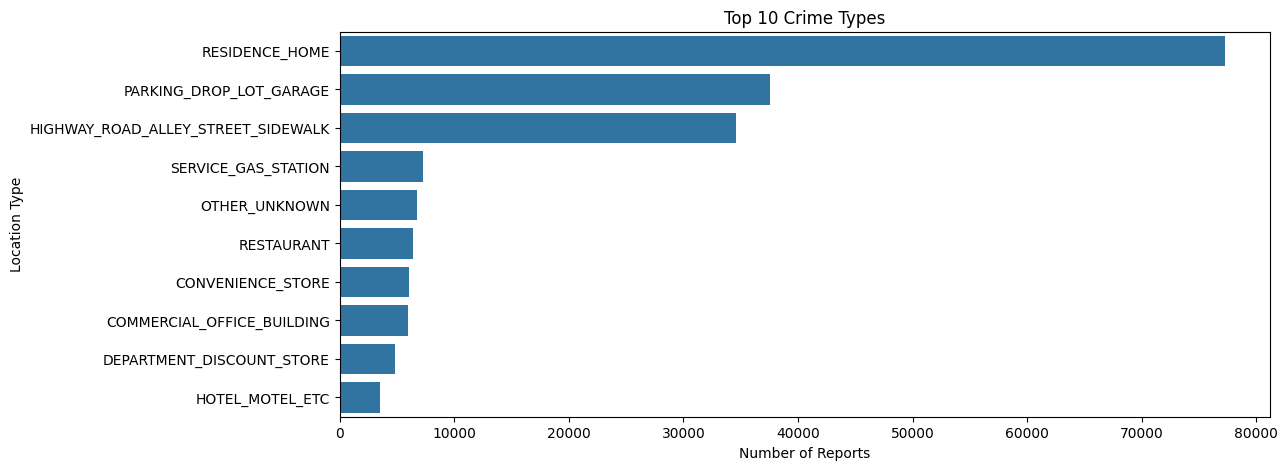

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="LocationType", order=df["LocationType"].value_counts().index[:10])
plt.title("Top 10 Crime Types")
plt.xlabel("Number of Reports")
plt.ylabel("Location Type")
plt.show()


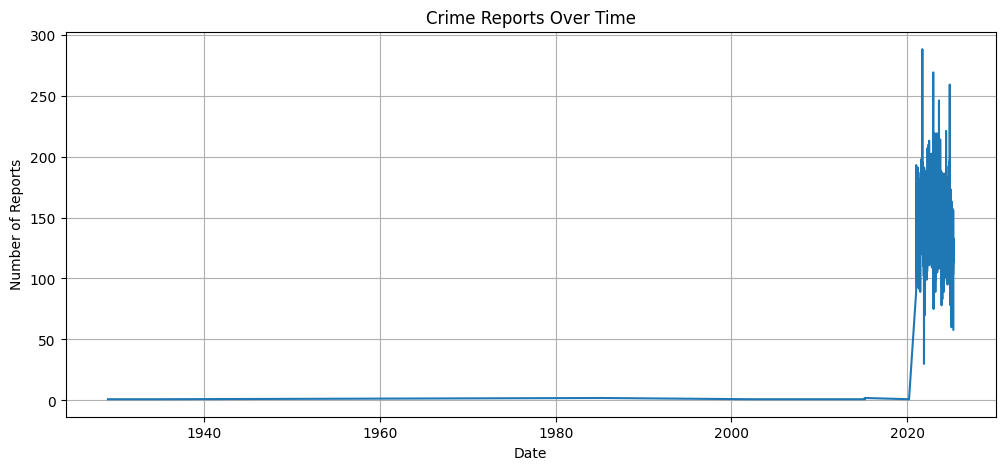

In [ ]:
df["ReportDate"] = pd.to_datetime(df["ReportDate"])

plt.figure(figsize=(12, 5))
df["ReportDate"].dt.date.value_counts().sort_index().plot()
plt.title("Crime Reports Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reports")
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import re
# Sample dataframe setup (for demonstration)
# df = pd.read_csv('your_data.csv') # Load your actual data here

# Creating a mapping dictionary for offense codes and their respective categories
offense_category_mapping = {
    '720': 'Animal Cruelty',
    '200': 'Arson',
    '13X': 'Assault Offenses',

    '510': 'Bribery',
    '220':'Burglary/Breaking & Entering',

    '58X': "Commerce Violations",
    '61X' : 'Commerce Violations',
    '620': 'Commerce Violations',

    '250':'Counterfeiting/Forgery',
    '290':'Destruction/Damage/Vandalism of Property',
    '35X':'Drug/Narcotic Offenses',
    '26X':'Fraud Offenses',
    '270':'Embezzlement',
    '103':'Espionage',
    '210':'Extortion/Blackmail',
    '49X':'Fugitive Offenses',
    '39X':'Gambling Offenses',
    '09X':'Homicide Offenses',
    '64X':'Human Trafficking',
    '30X':'Immigration Violations',
    '100':'Kidnapping/Abduction',
    '23X':'Larceny/Theft Offenses',
    '240':'Motor Vehicle Theft',
    '370':'Pornography/Obscene Material',
    '40X':'Prostitution Offenses',
    '120':'Robbery',
    '11X':'Sex Offenses',
    '36X':'Sex Offenses',
    '280': 'Stolen Property Offenses',
    '101': 'Treason',
    '520': 'Weapon Law Violations',
    '521': 'Weapon Law Violations',
    '522': 'Weapon Law Violations',
    '526': 'Weapon Law Violations',
    '90K':'Bond Default',
    '90A':'Bad Checks',
    '90B':'Curfew/Loitering/Vagrancy Violations',
    '90C':'Disorderly Conduct',
    '90D':'Driving Under the Influence',
    '90E':'Drunkenness',
    '90F':'Family Offenses, Nonviolent',
    '90L':'Federal Resource Violation',
    '90G':'Liquor Law Violations',
    '90M':'Perjury',
    '90H':'Peeping Tom',
    '90I':'Runaway',
    '90J':'Trespass of Real Property',
    '90Z':'All Other Offenses'


}

# Define a function to map each offense code to the broader category
def map_offense_category(row):
    offense_code = str(row['NibrsUcrCode']).strip().lower()  # Trim and convert offense code to lowercase
    for code, category in offense_category_mapping.items():
        # Trim and lowercase the offense category code before matching

       category_code = code.strip().lower()
       if category_code.endswith('x'):
            # Regex to match category_code followed by any single alphabet letter (case-insensitive)
            if re.match(f"^{category_code[:-1]}[a-zA-Z]$", offense_code):
                return category
       elif offense_code == category_code:
            return category
    return 'Other'  # If no match is found, categorize as 'Other'


# Apply the mapping function to create a new column 'Offense_Category'
df['Offense_Category'] = df.apply(map_offense_category, axis=1)

# Save the modified dataframe to CSV (optional)
# df.to_csv('modified_offense_data.csv', index=False)

# Display the dataframe with the new 'Offense_Category' column
print(df[['NibrsUcrCode', 'NIBRS_Offense', 'Offense_Category']])


       NibrsUcrCode                               NIBRS_Offense  \
0               26B  Credit Card/Automated Teller Machine Fraud   
1               90Z                          All Other Offenses   
2               26A     False Pretenses/Swindle/Confidence Game   
3               90Z                          All Other Offenses   
4               26A     False Pretenses/Swindle/Confidence Game   
...             ...                                         ...   
246952          90Z                          All Other Offenses   
246953          35A                    Drug/Narcotic Violations   
246954          26A     False Pretenses/Swindle/Confidence Game   
246955          26A     False Pretenses/Swindle/Confidence Game   
246956          23F                    Theft From Motor Vehicle   

              Offense_Category  
0               Fraud Offenses  
1           All Other Offenses  
2               Fraud Offenses  
3           All Other Offenses  
4               Fraud Offenses

In [ ]:
print(df['Offense_Category'].unique())

['Fraud Offenses' 'All Other Offenses' 'Assault Offenses'
 'Larceny/Theft Offenses' 'Destruction/Damage/Vandalism of Property'
 'Motor Vehicle Theft' 'Robbery' 'Weapon Law Violations'
 'Drug/Narcotic Offenses' 'Disorderly Conduct'
 'Burglary/Breaking & Entering' 'Driving Under the Influence'
 'Liquor Law Violations' 'Embezzlement' 'Family Offenses, Nonviolent'
 'Sex Offenses' 'Counterfeiting/Forgery' 'Animal Cruelty'
 'Trespass of Real Property' 'Curfew/Loitering/Vagrancy Violations'
 'Stolen Property Offenses' 'Pornography/Obscene Material'
 'Homicide Offenses' 'Human Trafficking' 'Kidnapping/Abduction'
 'Drunkenness' 'Extortion/Blackmail' 'Bad Checks' 'Bribery' 'Peeping Tom'
 'Arson' 'Prostitution Offenses' 'Gambling Offenses']


In [ ]:
df['ReportDate'] = pd.to_datetime(df['ReportDate'])
df['Month'] = df['ReportDate'].dt.month

In [ ]:
df

,OBJECTID,ChargeId,IncidentNumber,ReportNumber,FireArmInvolved,ReportDate,OccurredFromDate,OccurredToDate,Day_of_the_week,Day_Number,...,NhoodName,DISTRICT,NPU,GlobalID,x,y,OffenseGroup,TimeCategory,Offense_Category,Month
0,732646,4368142,213645043,213645043-1,no,2021-12-30 15:14:05,2021-12-19 18:40:00,12/20/2021 3:40:00 PM,Sunday,1,...,Lenox,7.0,B,c2586b1e-64e9-4618-bfeb-39a978bca306,-84.362358,33.845306,GroupA,Evening,Fraud Offenses,12
1,732647,4368335,213645034,213645034-1,no,2021-12-30 13:35:16,2021-12-28 22:00:00,12/28/2021 10:10:00 PM,Tuesday,3,...,Edgewood,5.0,O,e6d9f36b-7960-4b82-a58e-1e91d9afa42f,-84.347267,33.758172,GroupB,Night,All Other Offenses,12
2,732648,4368359,213645037,213645037-1,no,2021-12-30 14:42:52,2021-11-16 18:10:00,11/17/2021 11:10:00 PM,Tuesday,3,...,Cascade Avenue/Road,4.0,S,ea7acb56-87c0-4ded-8121-d60dd2bcc4ca,-84.437838,33.725160,GroupA,Evening,Fraud Offenses,12
3,732649,4368481,213645030,213645030-1,no,2021-12-30 13:05:42,2021-09-18 18:58:00,12/29/2021 7:20:00 AM,Saturday,7,...,Reynoldstown,5.0,N,219169a9-67bf-4836-912a-d2d1aab88f11,-84.351699,33.757101,GroupB,Evening,All Other Offenses,12
4,732650,4368485,213645028,213645028-1,no,2021-12-30 12:54:49,2021-12-29 05:05:00,12/29/2021 5:05:00 AM,Wednesday,4,...,Chosewood Park,1.0,Y,682c4d84-1c9e-4421-9d2f-17915b249387,-84.376192,33.716448,GroupA,Morning,Fraud Offenses,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246952,1362089,7052539,250860434,250860434-1,no,2025-03-27 12:01:00,2025-03-27 07:00:00,3/27/2025 8:00:00 AM,Thursday,5,...,Capitol View,12.0,X,a82cb781-c07c-4eac-8b5d-6d6071fc046a,-84.416598,33.720111,GroupB,Morning,All Other Offenses,3
246953,1362090,7052574,250870713,250870713-1,no,2025-03-28 14:30:00,2025-03-28 14:03:00,3/28/2025 2:30:00 PM,Friday,6,...,Downtown,4.0,M,1893946a-0ac1-4eb8-93bc-835356936922,-84.389825,33.751867,GroupA,Afternoon,Drug/Narcotic Offenses,3
246954,1362091,7052600,250875039,250875039-1,no,2025-03-06 23:37:53,2025-02-26 19:29:00,3/6/2025 11:06:00 PM,Wednesday,4,...,Midtown,3.0,E,6b268ab0-0901-48f2-bb32-6a727202e336,-84.391074,33.796791,GroupA,Evening,Fraud Offenses,3
246955,1362092,7052601,250875040,250875040-1,no,2025-03-07 15:55:33,2025-02-27 04:41:00,2/27/2025 4:41:00 AM,Wednesday,4,...,Downtown,4.0,M,53a296a3-f52a-45a5-9fa8-6bf353018327,-84.394992,33.747680,GroupA,Night,Fraud Offenses,3


In [ ]:
import plotly.express as px

# Define color mapping for Group A (shades of blue) and Group B (shades of red)
color_map = {
    'GroupA': 'Blues',  # Shades of blue
    'GroupB': 'Reds'    # Shades of red
}

# Aggregate data by OffenseGroup and NIBRS_Offense
agg_data = df.groupby(['OffenseGroup', 'NIBRS_Offense']).size().reset_index(name='Count')

# Create the bar plot
fig = px.bar(
    agg_data,
    x='NIBRS_Offense',
    y='Count',
    color='NIBRS_Offense',
    color_discrete_map={offense: px.colors.sequential.Blues[i % len(px.colors.sequential.Blues)]
                        if group == 'GroupA' else px.colors.sequential.Reds[i % len(px.colors.sequential.Reds)]
                        for i, (group, offense) in enumerate(zip(agg_data['OffenseGroup'], agg_data['NIBRS_Offense']))},
    title='Crime Types Distribution (Colored by Offense Group)',
    labels={'x': 'NIBRS_Offense', 'y': 'Number of Incidents'},
    template='plotly_white'
)

# Customize x-axis labels rotation
fig.update_xaxes(tickangle=-45)

# Show the interactive plot
fig.show()


In [ ]:
import pandas as pd

# Define the mapping of NIBRS_Offense to Patrol Type for all listed offenses
crime_to_patrol = {
    'Credit Card/Automated Teller Machine Fraud': 'Vehicle Patrol',
    'All Other Offenses': 'Vehicle Patrol',
    'False Pretenses/Swindle/Confidence Game': 'Vehicle Patrol',
    'Aggravated Assault': 'Vehicle Patrol',
    'Theft From Motor Vehicle': 'Foot Patrol',
    'Destruction/Damage/Vandalism of Property': 'Bicycle Patrol',
    'Simple Assault': 'Foot Patrol',
    'Motor Vehicle Theft': 'Vehicle Patrol',
    'All Other Larceny': 'Foot Patrol',
    'Robbery': 'Vehicle Patrol',
    'Shoplifting': 'Foot Patrol',
    'Weapon Law Violations': 'Motorcycle Patrol',
    'Drug/Narcotic Violations': 'Vehicle Patrol',
    'Disorderly Conduct': 'Foot Patrol',
    'Wire Fraud': 'Vehicle Patrol',
    'Burglary/Breaking & Entering': 'Motorcycle Patrol',
    'Driving Under the Influence': 'Vehicle Patrol',
    'Drug Equipment Violations': 'Bicycle Patrol',
    'Theft of Motor Vehicle Parts or Accessories': 'Foot Patrol',
    'Theft From Building': 'Bicycle Patrol',
    'Liquor Law Violations': 'Vehicle Patrol',
    'Embezzelment': 'Vehicle Patrol',
    'Family Offenses, Nonviolent': 'Foot Patrol',
    'Fondling': 'Foot Patrol',
    'Identity Theft': 'Vehicle Patrol',
    'Counterfeiting/Forgery': 'Vehicle Patrol',
    'Animal Cruelty': 'Foot Patrol',
    'Trespass of Real Property': 'Bicycle Patrol',
    'Impersonation': 'Vehicle Patrol',
    'Curfew/Loitering/Vagrancy Violations': 'Bicycle Patrol',
    'Intimidation': 'Foot Patrol',
    'Stolen Property Offenses': 'Vehicle Patrol',
    'Rape': 'Foot Patrol',
    'Welfare Fraud': 'Vehicle Patrol',
    'Pornography/Obscene Material': 'Vehicle Patrol',
    'Sodomy': 'Foot Patrol',
    'Murder & Nonnegligent Manslaughter': 'Vehicle Patrol',
    'Sexual Assault with An Object': 'Foot Patrol',
    'Statutory Rape': 'Foot Patrol',
    'Human Trafficking, Commercial Sex Acts': 'Vehicle Patrol',
    'Kidnapping/Abduction': 'Vehicle Patrol',
    'Purse-snatching': 'Foot Patrol',
    'Pocket-picking': 'Foot Patrol',
    'Drunkenness': 'Foot Patrol',
    'Extortion/Blackmail': 'Motorcycle Patrol',
    'Theft From Coin-Operated Machine or Device': 'Foot Patrol',
    'Bad Checks': 'Vehicle Patrol',
    'Bribery': 'Vehicle Patrol',
    'Peeping Tom': 'Foot Patrol',
    'Arson': 'Motorcycle Patrol',
    'Prostitution': 'Motorcycle Patrol',
    'Hacking/Computer Invasion': 'Vehicle Patrol',
    'Assisting or Promoting Prostitution': 'Motorcycle Patrol',
    'Human Trafficking, Involuntary Servitude': 'Vehicle Patrol',
    'Incest': 'Foot Patrol',
    'Gambling Equipment Violations': 'Vehicle Patrol',
    'Operating/Promoting/Assisting Gambling': 'Vehicle Patrol'
}

# Assuming df is your existing DataFrame, map the NIBRS_Offense to Patrol Type
df['Patrol Type'] = df['NIBRS_Offense'].map(crime_to_patrol)

# Check the result
print(df[['NIBRS_Offense', 'Patrol Type']].head())


                                NIBRS_Offense     Patrol Type
0  Credit Card/Automated Teller Machine Fraud  Vehicle Patrol
1                          All Other Offenses  Vehicle Patrol
2     False Pretenses/Swindle/Confidence Game  Vehicle Patrol
3                          All Other Offenses  Vehicle Patrol
4     False Pretenses/Swindle/Confidence Game  Vehicle Patrol


In [ ]:
df.to_csv('updated_patrol_types.csv', index=False)

<ipython-input-16-73ead679f91b>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




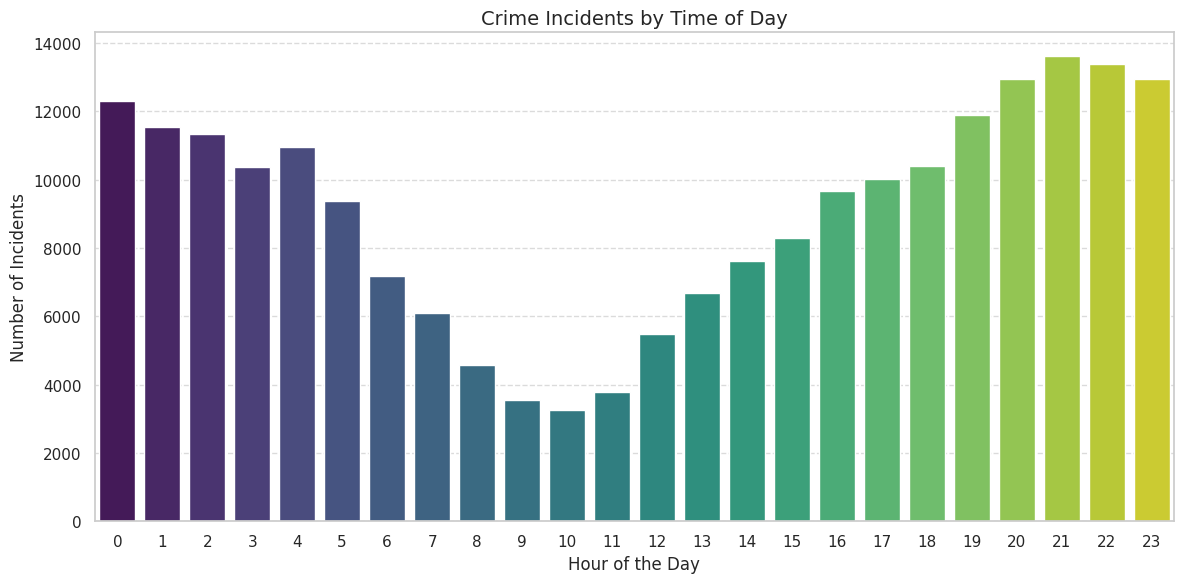

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'OccurredFromDate' to datetime format
df['OccurredFromDate'] = pd.to_datetime(df['OccurredFromDate'], errors='coerce')

# Extract the hour from the 'OccurredFromDate' column
df['Hour'] = df['OccurredFromDate'].dt.hour

# Drop rows where 'Hour' could not be extracted (NaN values)
data = df.dropna(subset=['Hour'])

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create the bar plot to show crime incidents by hour of the day
sns.countplot(x='Hour', data=data, palette='viridis', order=sorted(data['Hour'].unique()))

# Add labels and title
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.title('Crime Incidents by Time of Day', fontsize=14)

# Display grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(df['Zone'].unique())

['Zone 2' 'Zone 6' 'Zone 4' 'Zone 3' 'Zone 5' 'Zone 1']


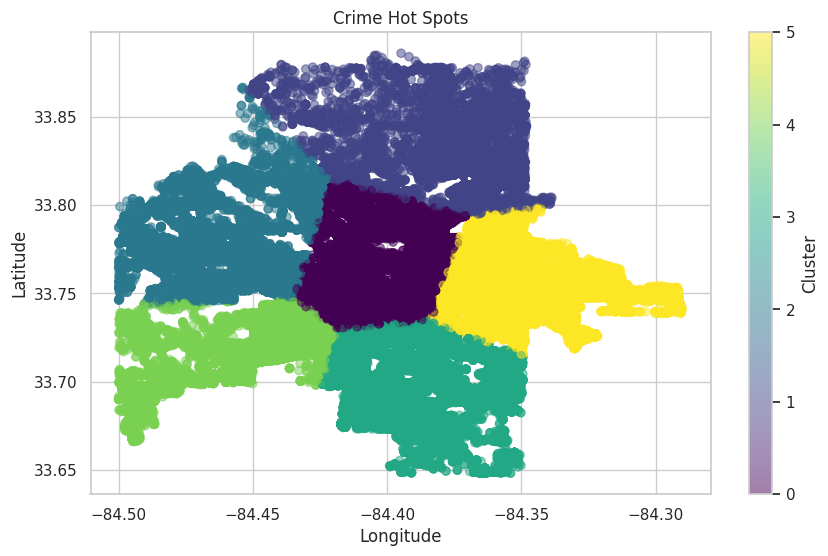

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare latitude and longitude for clustering
coords = df[['Latitude', 'Longitude']].dropna()

# Use KMeans to find crime hot spots (e.g., 5 clusters)
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(coords)

# Plot the crime clusters on a map
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hot Spots')
plt.colorbar(label='Cluster')
plt.show()


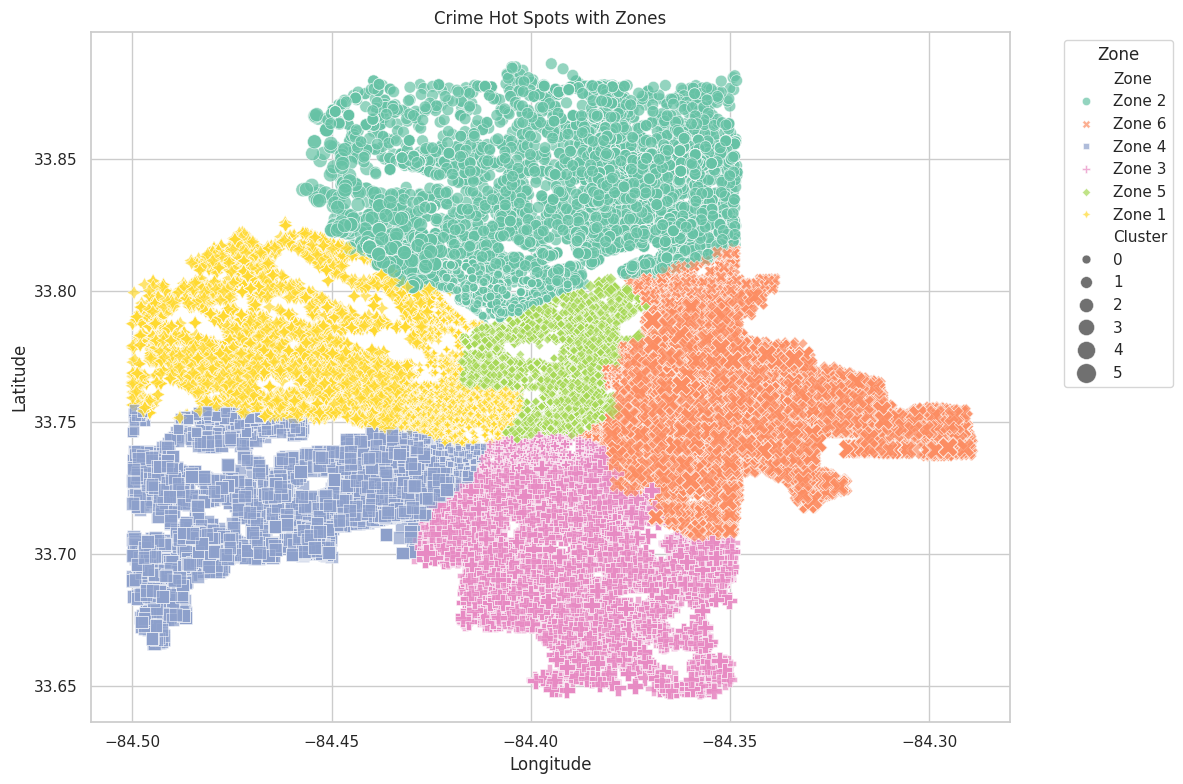

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare latitude, longitude, and zone for clustering
coords = df[['Latitude', 'Longitude']].dropna()

# Use KMeans to find crime hot spots (e.g., 6 clusters)
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(coords)

# Plotting
plt.figure(figsize=(12, 8))

# Create a scatter plot with zone-based color mapping
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Zone', palette='Set2', style='Zone', size='Cluster', sizes=(40, 200), alpha=0.7)

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hot Spots with Zones')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:

neighborhoods = df['NhoodName'].unique().tolist()
neighborhood_to_int = {name: idx for idx, name in enumerate(sorted(neighborhoods))}
df['NhoodEncoded'] = df['NhoodName'].map(neighborhood_to_int)

time_categories = ['Morning', 'Afternoon', 'Evening', 'Night']
time_to_int = {name: idx for idx, name in enumerate(time_categories)}
df['TimeCategoryEncoded'] = df['TimeCategory'].map(time_to_int)

offensecategoryEncoded = df['Offense_Category'].unique().tolist()
offensecategoryEncoded_to_int = {name: idx for idx, name in enumerate(sorted(offensecategoryEncoded))}
df['OffenseCategoryEncoded'] = df['Offense_Category'].map(offensecategoryEncoded_to_int)




In [ ]:
df.columns

Index(['OBJECTID', 'ChargeId', 'IncidentNumber', 'ReportNumber',
       'FireArmInvolved', 'ReportDate', 'OccurredFromDate', 'OccurredToDate',
       'Day_of_the_week', 'Day_Number', 'Part', 'Crime_Against',
       'NibrsUcrCode', 'NIBRS_Offense', 'StreetAddress', 'Longitude',
       'Latitude', 'IsBiasMotivationInvolved', 'event_watch', 'Zone',
       'Zone_int', 'LocationType', 'Beat', 'NhoodName', 'DISTRICT', 'NPU',
       'GlobalID', 'x', 'y', 'OffenseGroup', 'TimeCategory',
       'Offense_Category', 'Month', 'Patrol Type'],
      dtype='object')

In [ ]:
df.to_csv('encoded_crime_data.csv', index=False)

In [3]:

import pandas as pd
df = pd.read_csv('encoded_crime_data.csv', low_memory=False)

df['ReportDate'] = pd.to_datetime(df['ReportDate'])
df['Month'] = df['ReportDate'].dt.month
df.columns

Index(['OBJECTID', 'ChargeId', 'IncidentNumber', 'ReportNumber',
       'FireArmInvolved', 'ReportDate', 'OccurredFromDate', 'OccurredToDate',
       'Day_of_the_week', 'Day_Number', 'Part', 'Crime_Against',
       'NibrsUcrCode', 'NIBRS_Offense', 'StreetAddress', 'Longitude',
       'Latitude', 'IsBiasMotivationInvolved', 'event_watch', 'Zone',
       'Zone_int', 'LocationType', 'Beat', 'NhoodName', 'DISTRICT', 'NPU',
       'GlobalID', 'x', 'y', 'OffenseGroup', 'TimeCategory',
       'Offense_Category', 'Month', 'PatrolType', 'NhoodEncoded',
       'TimeCategoryEncoded', 'OffenseCategoryEncoded'],
      dtype='object')

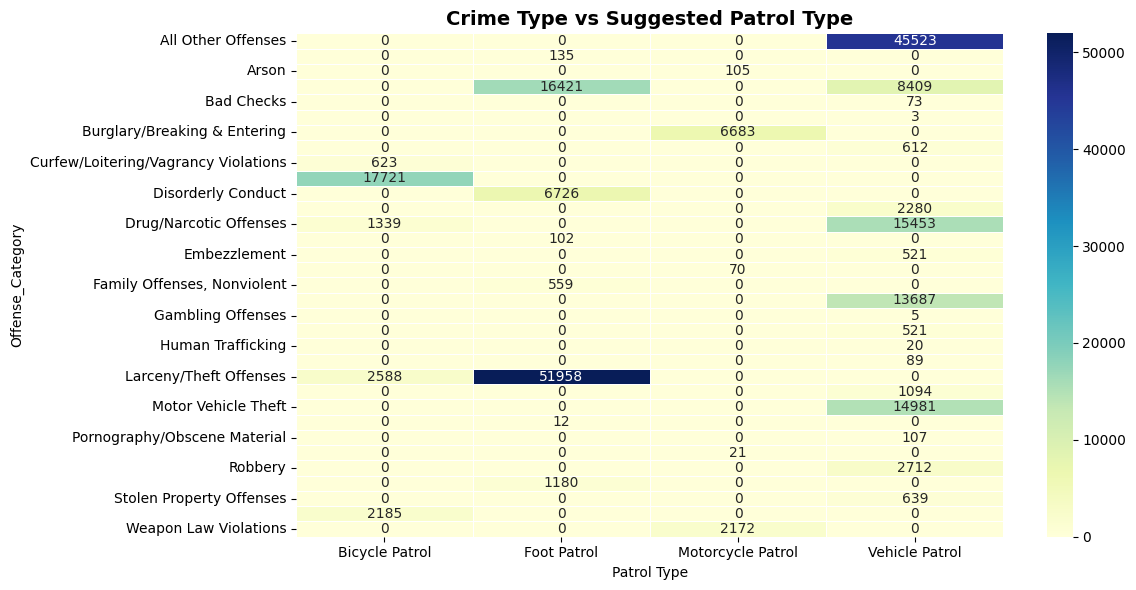

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cross_tab = pd.crosstab(df['Offense_Category'], df['PatrolType'])

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title("Crime Type vs Suggested Patrol Type", fontsize=14, weight='bold')
plt.ylabel("Offense_Category")
plt.xlabel("Patrol Type")
plt.tight_layout()
plt.show()


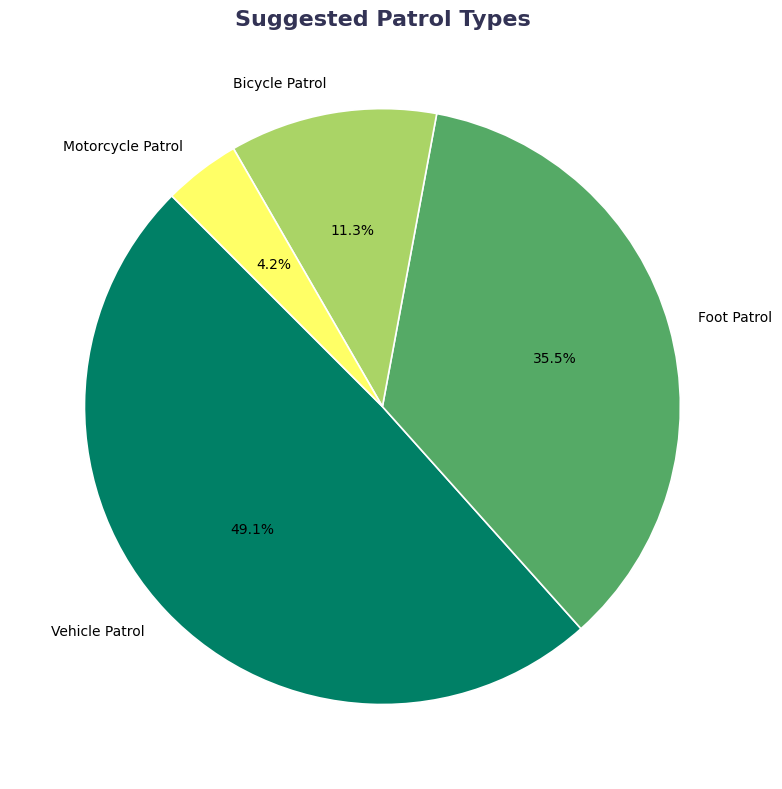

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get counts and labels
patrol_counts = df['PatrolType'].value_counts()
labels = patrol_counts.index

# Generate cool colormap (as many as there are patrol types)
cool_colormap = plt.cm.summer(np.linspace(0, 1, len(patrol_counts)))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    patrol_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=135,
    colors=cool_colormap,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2}
)
plt.title("Suggested Patrol Types", fontsize=16, weight='bold', color='#333355')
plt.tight_layout()
plt.show()


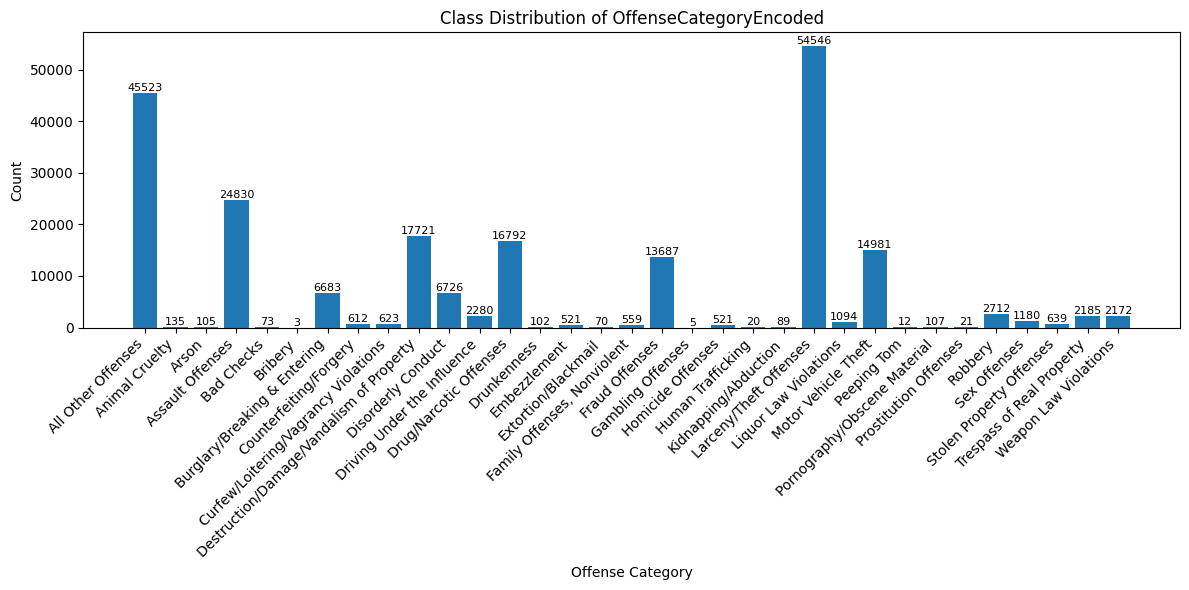

In [11]:
import matplotlib.pyplot as plt

# Count each class
class_counts = df['OffenseCategoryEncoded'].value_counts().sort_index()

# Optionally map to labels
crime_code_mapping = dict(zip(df['OffenseCategoryEncoded'], df['Offense_Category']))
labels = [crime_code_mapping[i] for i in class_counts.index]

# Print raw counts
# print(class_counts)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, class_counts.values)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=8)

# Titles and labels
plt.title('Class Distribution of OffenseCategoryEncoded')
plt.xlabel('Offense Category')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('offense_category_distribution.png', dpi=300)

plt.show()


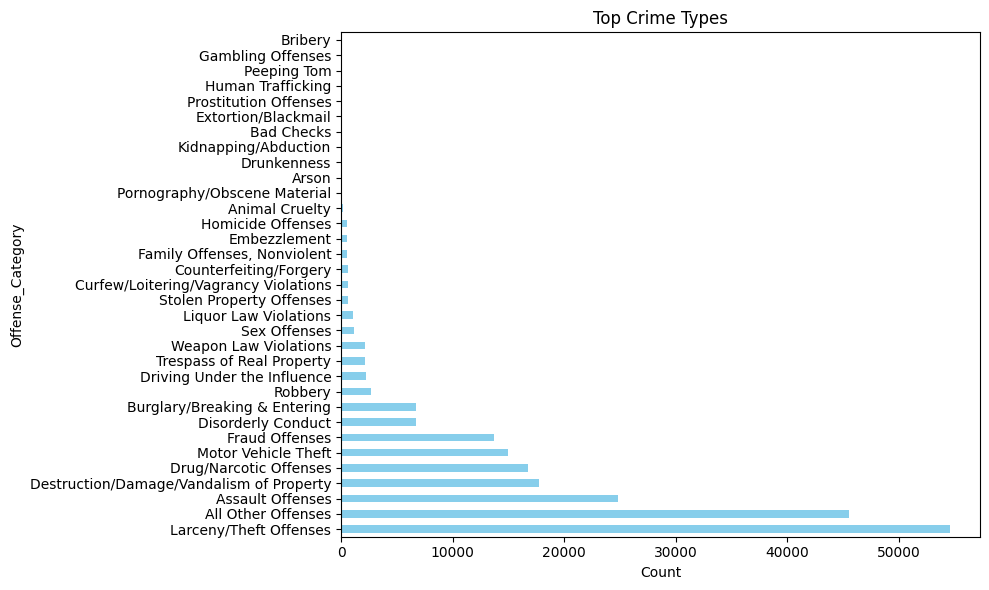

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data
# df = pd.read_csv("your_dataset.csv", low_memory=False)  # Update filename!

# print(df.columns)

# Convert to datetime
df['OccurredFromDate'] = pd.to_datetime(df['OccurredFromDate'], errors='coerce')
df.dropna(subset=['OccurredFromDate'], inplace=True)

# 1. Crime Type Distribution
plt.figure(figsize=(10, 6))
df['Offense_Category'].value_counts().plot(kind='barh', color='skyblue')
plt.title("Top Crime Types")
plt.xlabel("Count")
plt.tight_layout()
plt.show()




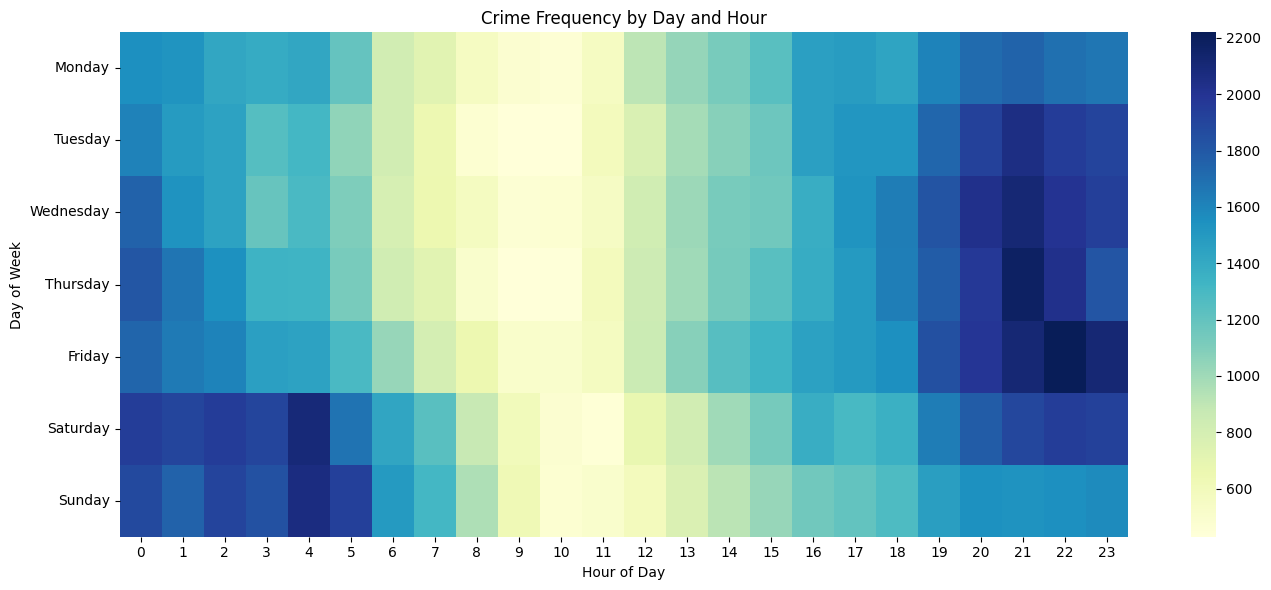

In [19]:
# 2. Heatmap: Day of Week vs Hour
df['DayOfWeek'] = df['OccurredFromDate'].dt.day_name()
df['Hour'] = df['OccurredFromDate'].dt.hour
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Crime Frequency by Day and Hour")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()

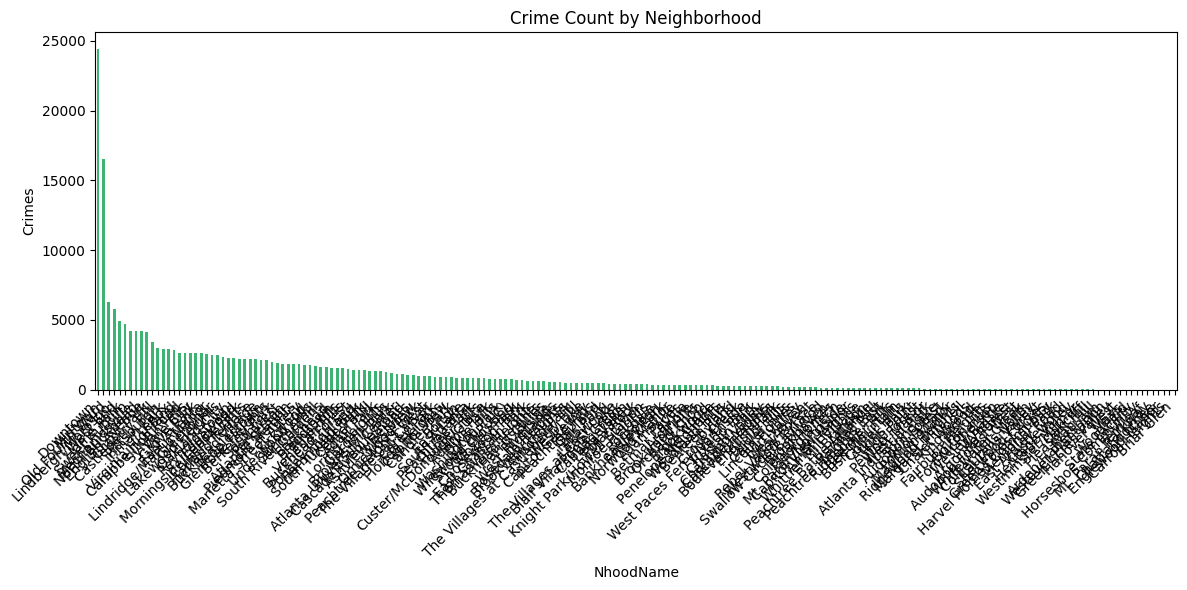

In [20]:

# 3. Crime Density by Neighborhood
plt.figure(figsize=(12, 6))
df['NhoodName'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title("Crime Count by Neighborhood")
plt.ylabel("Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


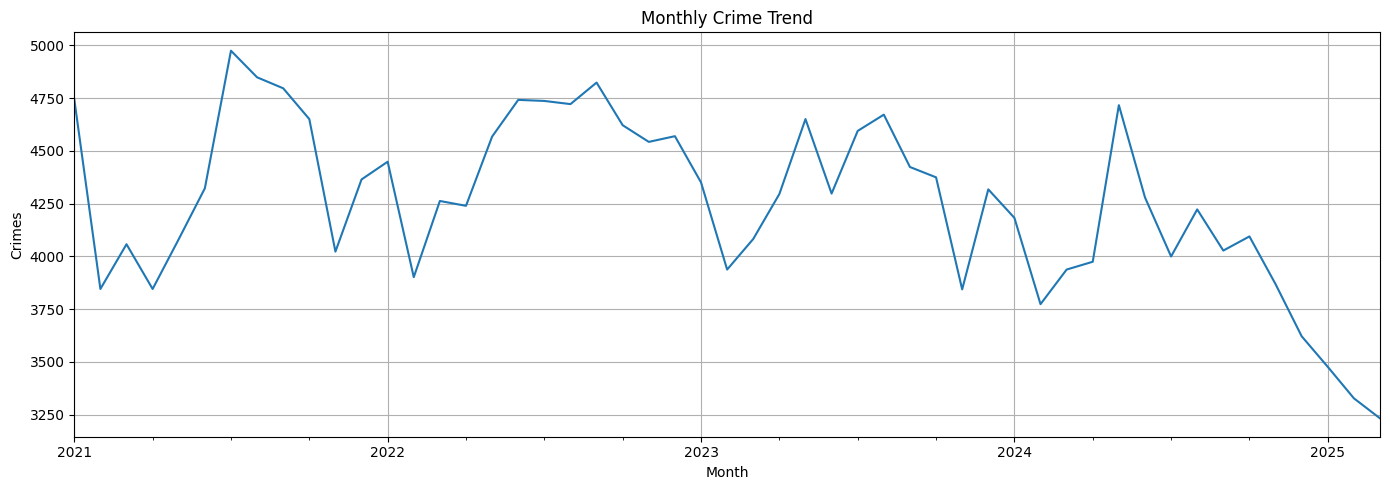

In [21]:


# 4. Monthly Crime Trend
df['YearMonth'] = df['OccurredFromDate'].dt.to_period('M')
monthly_counts = df.groupby('YearMonth').size()
plt.figure(figsize=(14, 5))
monthly_counts.plot()
plt.title("Monthly Crime Trend")
plt.ylabel("Crimes")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

